In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv('/content/drive/MyDrive/Highway.pcap_Flow.csv')



df




,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.8.100-192.168.8.101-139-50360-6,192.168.8.101,50360,192.168.8.100,139,6,05/02/2019 08:42:18 PM,10757855,11,10,...,0,184542.0,0.000000,184542.0,184542.0,1.056323e+07,0.000000e+00,10563228.0,10563228.0,No Label
1,192.168.8.100-192.168.8.101-139-50360-6,192.168.8.101,50360,192.168.8.100,139,6,05/02/2019 08:42:29 PM,3928,0,2,...,0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
2,192.168.8.100-192.168.8.101-139-50361-6,192.168.8.101,50361,192.168.8.100,139,6,05/02/2019 08:42:18 PM,10710506,11,11,...,0,121291.0,0.000000,121291.0,121291.0,1.056354e+07,0.000000e+00,10563539.0,10563539.0,No Label
3,159.65.193.47-192.168.8.101-443-50372-6,192.168.8.101,50372,159.65.193.47,443,6,05/02/2019 08:44:04 PM,2883069,8,11,...,0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
4,172.217.168.227-192.168.8.101-443-50368-6,192.168.8.101,50368,172.217.168.227,443,6,05/02/2019 08:43:59 PM,10201033,1,3,...,0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747690,192.168.0.4-192.168.0.6-80-27249-6,192.168.0.6,27249,192.168.0.4,80,6,05/02/2019 09:19:19 PM,47419963,1,5,...,0,716.0,0.000000,716.0,716.0,4.741878e+07,0.000000e+00,47418779.0,47418779.0,No Label
747691,192.168.0.4-192.168.0.8-80-41569-17,192.168.0.8,41569,192.168.0.4,80,17,05/02/2019 09:31:58 PM,72488445,4,1,...,0,0.0,0.000000,0.0,0.0,1.812211e+07,1.291457e+07,33749188.0,5200329.0,No Label
747692,192.168.0.4-192.168.0.8-80-41570-17,192.168.0.8,41570,192.168.0.4,80,17,05/02/2019 09:31:58 PM,72488446,3,1,...,0,0.0,0.000000,0.0,0.0,2.416282e+07,1.234688e+07,33749206.0,10230619.0,No Label
747693,192.168.0.4-192.168.0.8-80-41571-17,192.168.0.8,41571,192.168.0.4,80,17,05/02/2019 09:31:58 PM,72488890,3,1,...,0,0.0,0.000000,0.0,0.0,2.416296e+07,1.234724e+07,33749543.0,10230335.0,No Label


# New Section

# New Section

In [ ]:
print(df.columns)

In [ ]:
df.dtypes

Flow ID       object
Src IP        object
Src Port       int64
Dst IP        object
Dst Port       int64
              ...   
Idle Mean    float64
Idle Std     float64
Idle Max     float64
Idle Min     float64
Label         object
Length: 84, dtype: object

In [ ]:
df['Src IP'].value_counts()


In [ ]:

df.isnull().sum()

In [ ]:

df = df.dropna()


In [ ]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.8.100-192.168.8.101-139-50360-6,192.168.8.101,50360,192.168.8.100,139,6,05/02/2019 08:42:18 PM,10757855,11,10,...,0,184542.0,0.000000,184542.0,184542.0,1.056323e+07,0.000000e+00,10563228.0,10563228.0,No Label
1,192.168.8.100-192.168.8.101-139-50360-6,192.168.8.101,50360,192.168.8.100,139,6,05/02/2019 08:42:29 PM,3928,0,2,...,0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
2,192.168.8.100-192.168.8.101-139-50361-6,192.168.8.101,50361,192.168.8.100,139,6,05/02/2019 08:42:18 PM,10710506,11,11,...,0,121291.0,0.000000,121291.0,121291.0,1.056354e+07,0.000000e+00,10563539.0,10563539.0,No Label
3,159.65.193.47-192.168.8.101-443-50372-6,192.168.8.101,50372,159.65.193.47,443,6,05/02/2019 08:44:04 PM,2883069,8,11,...,0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
4,172.217.168.227-192.168.8.101-443-50368-6,192.168.8.101,50368,172.217.168.227,443,6,05/02/2019 08:43:59 PM,10201033,1,3,...,0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747690,192.168.0.4-192.168.0.6-80-27249-6,192.168.0.6,27249,192.168.0.4,80,6,05/02/2019 09:19:19 PM,47419963,1,5,...,0,716.0,0.000000,716.0,716.0,4.741878e+07,0.000000e+00,47418779.0,47418779.0,No Label
747691,192.168.0.4-192.168.0.8-80-41569-17,192.168.0.8,41569,192.168.0.4,80,17,05/02/2019 09:31:58 PM,72488445,4,1,...,0,0.0,0.000000,0.0,0.0,1.812211e+07,1.291457e+07,33749188.0,5200329.0,No Label
747692,192.168.0.4-192.168.0.8-80-41570-17,192.168.0.8,41570,192.168.0.4,80,17,05/02/2019 09:31:58 PM,72488446,3,1,...,0,0.0,0.000000,0.0,0.0,2.416282e+07,1.234688e+07,33749206.0,10230619.0,No Label
747693,192.168.0.4-192.168.0.8-80-41571-17,192.168.0.8,41571,192.168.0.4,80,17,05/02/2019 09:31:58 PM,72488890,3,1,...,0,0.0,0.000000,0.0,0.0,2.416296e+07,1.234724e+07,33749543.0,10230335.0,No Label


In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

In [ ]:
obj_df["Flow ID"].value_counts()

In [ ]:
obj_df["Dst IP"].value_counts()

In [ ]:
obj_df["Timestamp"].value_counts()

In [ ]:
df= df.drop(['Flow ID' , 'Dst IP' , 'Timestamp' ,'Label'] , axis=1)


In [ ]:
df.rename({'Src IP':'Label'} , axis=1 , inplace=True)


In [ ]:
# 0-> UDP flood , 1->SYN flood , 2->Slowries , 3->Beningn
df['Label'] = ["UDP flood" if x=="192.168.0.8"
               else "SYN flood" if x=="192.168.0.6"
               else "Slowries" if x=="192.168.0.7"
               else "Benign" for x in df['Label']]

In [ ]:
numeric_features = df.dtypes[df.dtypes!='object'].index
np.where(np.isinf(df[numeric_features]))

(array([ 88311,  88311,  88433,  88433,  88484,  88484,  88505,  88505,
        206735, 206735]), array([16, 17, 16, 17, 16, 17, 16, 17, 16, 17]))

In [ ]:
df[numeric_features] = df[numeric_features].drop(df[numeric_features].index[[88311, 88433, 88484, 88505, 206735]])

In [ ]:
class_0 = df[df['Label'] == 'UDP flood']
class_1 = df[df['Label'] == 'Slowries']
class_2 =df[df['Label'] == 'SYN flood']
class_3 =df[df['Label'] == 'Benign']

In [ ]:
class_count_2= 280000

In [ ]:
class_1_over = class_1.sample(class_count_2, replace=True)
class_3_over = class_3.sample(class_count_2, replace=True)


df = pd.concat([class_1_over, class_0 , class_2, class_3_over])

# print the number of class count
df['Label'].value_counts()

UDP flood    395779
SYN flood    283114
Slowries     280000
Benign       280000
Name: Label, dtype: int64

In [ ]:
df['Label'].value_counts(ascending=True).plot(kind='barh')

In [ ]:
df.isnull().any().any()

False

In [ ]:
df.info()

In [ ]:
df.iloc[df.values==np.inf]

In [ ]:
x , y = df.loc[: , df.columns != 'Label'] , df['Label']
# Only select rows that have all finite entries
x = x[np.all(np.isfinite(x), axis=1)]
#scaler = StandardScaler()
scaler = QuantileTransformer()
scaler.fit_transform(x)



In [ ]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
#x = x.apply(lambda x: (x*255))

In [ ]:
numeric_features = df.dtypes[df.dtypes!='object'].index
np.where(np.isinf(df[numeric_features]))


(array([], dtype=int64), array([], dtype=int64))

In [ ]:
df[numeric_features] = df[numeric_features].drop(df[numeric_features].index[[88311, 88433, 88484, 88505, 206735]])

In [ ]:
df[numeric_features] = df[numeric_features].drop(df[numeric_features].index[[963052,976865,1020976,1027673,1039346,
                                                                            1048746,1053716,1098223, 1103476, 1116939,
                                                                             1132796, 1138843, 1150836, 1179102, 1185421,
                                                                             1194314, 1199769, 1206028, 1212396, 1229398,
                                                                             1230686, 1238406]])


In [ ]:
np.where(np.isinf(df[numeric_features]))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
scaler = QuantileTransformer()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [ ]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,747693.000000,747693.000000,747693.000000,7.476930e+05,747693.000000,747693.000000,7.476930e+05,7.476930e+05,747693.000000,747693.000000,...,747693.000000,747693.0,7.476930e+05,7.476930e+05,7.476930e+05,7.476930e+05,7.476930e+05,7.476930e+05,7.476930e+05,7.476930e+05
mean,34598.497223,156.542426,11.840483,5.909530e+07,3.882408,2.235237,6.354393e+02,1.285335e+02,0.858253,0.089137,...,0.817691,0.0,6.889910e+05,2.976478e+04,7.122629e+05,6.675456e+05,2.214611e+07,1.003850e+07,3.311919e+07,1.399991e+07
std,19463.424235,1935.511577,5.490871,3.989031e+07,149.007294,46.519699,1.212554e+05,2.824814e+04,24.295371,4.342349,...,148.601286,0.0,1.619220e+06,3.181710e+05,1.707367e+06,1.574567e+06,1.891957e+07,1.157818e+07,2.448833e+07,1.844185e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,17497.000000,80.000000,6.000000,1.988918e+07,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.157280e+07,0.000000e+00,1.439316e+07,5.165387e+06
50%,35594.000000,80.000000,17.000000,6.452130e+07,3.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.963400e+07,7.606890e+06,3.295321e+07,7.780162e+06
75%,52209.000000,80.000000,17.000000,9.435282e+07,4.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,4.250000e+02,0.000000e+00,4.510000e+02,3.800000e+02,2.895421e+07,1.567101e+07,4.812135e+07,1.541673e+07
max,65535.000000,65151.000000,17.000000,1.200000e+08,58243.000000,18667.000000,4.579386e+07,1.635127e+07,1460.000000,1400.000000,...,58243.000000,0.0,1.033909e+08,6.501589e+07,1.033909e+08,1.033909e+08,1.199985e+08,7.692323e+07,1.199985e+08,1.199985e+08


In [ ]:
df0=df[df['Label']=='Benign'].drop(['Label'],axis=1)
df1=df[df['Label']=='UDP flood'].drop(['Label'],axis=1)
df2=df[df['Label']=='SYN flood'].drop(['Label'],axis=1)
df3=df[df['Label']=='Slowries'].drop(['Label'],axis=1)


In [ ]:
# Generate 79*79 color images for class 0 (BENIGN)
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path)

for i in range(0, len(df0)):
    count=count+1
    if count<=237:
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 1 (UDP flood)
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path)

for i in range(0, len(df1)):
    count=count+1
    if count<=237:
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 2 (SYN flood)
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path)

for i in range(0, len(df2)):
    count=count+1
    if count<=237:
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 3 (Slowries attack)
count=0
ims = []

image_path = "train/3/"
os.makedirs(image_path)


for i in range(0, len(df3)):
    count=count+1
    if count<=237:
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

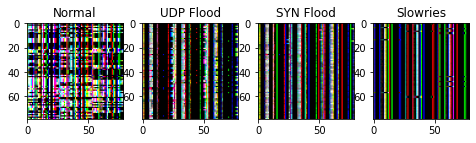

In [ ]:
# Read the images for each category
img1 = Image.open('./train/0/237.png')
img2 = Image.open('./train/1/237.png')
img3 = Image.open('./train/2/237.png')
img4 = Image.open('./train/3/237.png')


plt.figure(figsize=(10, 10))
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
img1.save('Normal2.jpg','JPEG')
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("UDP Flood")
img2.save('UDP Flood.jpg','JPEG')
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("SYN Flood")
img3.save('SYN Flood.jpg','JPEG')
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("Slowries")
img4.save('Slowries.jpg','JPEG')
plt.show()  # display it

In [ ]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

3139


In [ ]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//3	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile,dstfile)

In [ ]:
# The size of test set
Numbers

1046

In [ ]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [ ]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [ ]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [ ]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


In [ ]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
import keras.callbacks as kcallbacks
import keras
#from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
#"categorical": 2D output (aka. list of numbers of length N), [0, 0, 1, 0], which is a one-hot encoding (only one number is 1/ "hot") representing the donkey. This is for mutually exclusive labels
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 2093 images belonging to 4 classes.
Found 1046 images belonging to 4 classes.


In [ ]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_accuracy = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_accuracy['batch'].append(logs.get('val_accuracy'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_accuracy['epoch'].append(logs.get('val_accuracy'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        #plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_accuracy[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.savefig('diagram.jpg')
        plt.show()


In [ ]:
history_this= LossHistory()

In [ ]:
def cnn_by_own(input_shape,num_class,epochs,savepath='./model_own.h5'):
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy', patience=8, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel,history_this],
    )

Epoch 1/10
 6/17 [=========>....................] - ETA: 5s - loss: 1.2012 - accuracy: 0.3766

17/17 [==============================] - ETA: 0s - loss: 1.0629 - accuracy: 0.4286
Epoch 1: val_accuracy improved from -inf to 0.54015, saving model to ./model_own.h5
17/17 [==============================] - 16s 862ms/step - loss: 1.0629 - accuracy: 0.4286 - val_loss: 0.9249 - val_accuracy: 0.5402
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 0.8527 - accuracy: 0.6068
Epoch 2: val_accuracy improved from 0.54015 to 0.82409, saving model to ./model_own.h5
17/17 [==============================] - 14s 824ms/step - loss: 0.8527 - accuracy: 0.6068 - val_loss: 0.5490 - val_accuracy: 0.8241
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 0.4020 - accuracy: 0.8672
Epoch 3: val_accuracy improved from 0.82409 to 0.90918, saving model to ./model_own.h5
17/17 [==============================] - 14s 845ms/step - loss: 0.4020 - accuracy: 0.8672 - val_loss: 0.2520 - val_accuracy: 0.9092
Epoch 4/10
17/17 [==============================] - ETA: 0s - loss: 0.2508 

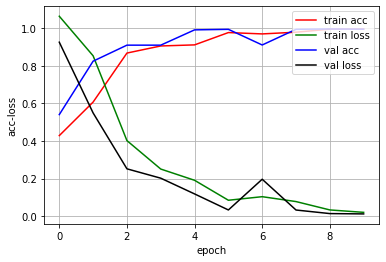

<function matplotlib.pyplot.show(*args, **kw)>

In [ ]:
cnn_by_own(input_shape=INPUT_SIZE,num_class=4,epochs=10)
history_this.loss_plot('epoch')
#history_this.loss_plot('batch')
plt.show


In [ ]:

plt.savefig('diagram.jpg')
#Image.open('diagram.png').save('diagram.jpg','JPEG')

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
#hyperparameter optimazation
def CNN( num_class,epochs=20,lr=0.001,patience=2, dropout_rate=0.5,verbose=0, savepath='./model_own.h5',history=history_this,input_shape=INPUT_SIZE):

    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel,history_this],
        verbose = verbose
    )
    return hist

In [ ]:
def prediction(CNN_model):
#read images from validation folder
    rootdir = './test_224/'
    test_laels = []
    test_images=[]
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
                continue
            test_laels.append(subdir.split('/')[-1])
            test_images.append(os.path.join(subdir, file))

    predict=[]
    length=len(test_images)
    label=validation_generator.class_indices
    label={v: k for k, v in label.items()}
    for i in range(length):
        inputimg=test_images[i]
        test_batch=[]
        thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
        #print(thisimg)
        test_shape=(1,)+thisimg.shape
        thisimg=thisimg.reshape(test_shape)
        CNN_model_batch=CNN_model.predict(thisimg) #use master model to process the input image
        #generate result by model 1
        prob=CNN_model_batch[0,np.argmax(CNN_model_batch,axis=1)[0]]
        res=label[np.argmax(CNN_model_batch,axis=1)[0]]
        predict.append(res)
    acc=accuracy_score(test_laels,predict)
    return acc

In [ ]:
#define the objective function to be optimized
import time
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials
import matplotlib.pyplot as plt
import statistics

def objective(params):

    params = {
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }

    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    CNN(num_class=4, epochs=epochs ,patience=patience, lr=lr, dropout_rate=dropout_rate)

    acc=prediction(CNN_model=load_model('./model_own.h5'))

    print('accuracy:%s'%acc)
    return {'loss': -acc, 'status': STATUS_OK }


In [ ]:
#Hyperparameter optimization by Bayesian optimization - Tree Parzen Estimator
space = {

    'epochs': hp.quniform('epochs', 5, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=8)

print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

  0%|          | 0/8 [00:00<?, ?it/s, best loss: ?]


Epoch 1: val_accuracy improved from -inf to 0.55258, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.55258


Epoch 3: val_accuracy did not improve from 0.55258

Epoch 3: early stopping

accuracy:0.5525812619502868
 12%|█▎        | 1/8 [02:40<18:44, 160.62s/it, best loss: -0.5525812619502868]


Epoch 1: val_accuracy improved from -inf to 0.55258, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.55258


Epoch 3: val_accuracy did not improve from 0.55258

Epoch 3: early stopping

accuracy:0.5525812619502868
 25%|██▌       | 2/8 [04:58<14:42, 147.06s/it, best loss: -0.5525812619502868]


Epoch 1: val_accuracy improved from -inf to 0.55258, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.55258


Epoch 3: val_accuracy did not improve from 0.55258

Epoch 3: early stopping

accuracy:0.5525812619502868
 38%|███▊      | 3/8 [07:17<11:56, 143.35s/it, best loss: -0.5525812619502868]


Epoch 1: val_accuracy improved from -inf to 0.36424, saving model to ./model_own.h5


Epoch 2: val_accuracy improved from 0.36424 to 0.55258, saving model to ./model_own.h5


Epoch 3: val_accuracy did not improve from 0.55258


Epoch 4: val_accuracy improved from 0.55258 to 0.70650, saving model to ./model_own.h5


Epoch 5: val_accuracy improved from 0.70650 to 0.99809, saving model to ./model_own.h5


Epoch 6: val_accuracy did not improve from 0.99809


Epoch 7: val_accuracy improved from 0.99809 to 0.99904, saving model to ./model_own.h5


Epoch 8: val_accuracy did not improve from 0.99904


Epoch 9: val_accuracy did not improve from 0.99904

Epoch 9: early stopping

accuracy:0.9990439770554493
 50%|█████     | 4/8 [12:08<13:26, 201.74s/it, best loss: -0.9990439770554493]


Epoch 1: val_accuracy improved from -inf to 0.55258, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.55258


Epoch 3: val_accuracy improved from 0.55258 to 0.59465, saving model to ./model_own.h5


Epoch 4: val_accuracy improved from 0.59465 to 0.91683, saving model to ./model_own.h5


Epoch 5: val_accuracy improved from 0.91683 to 0.95029, saving model to ./model_own.h5


Epoch 6: val_accuracy improved from 0.95029 to 0.99235, saving model to ./model_own.h5


Epoch 7: val_accuracy improved from 0.99235 to 0.99809, saving model to ./model_own.h5


Epoch 8: val_accuracy did not improve from 0.99809


Epoch 9: val_accuracy improved from 0.99809 to 0.99904, saving model to ./model_own.h5


Epoch 10: val_accuracy did not improve from 0.99904


Epoch 11: val_accuracy did not improve from 0.99904

Epoch 11: early stopping

accuracy:0.9990439770554493
 62%|██████▎   | 5/8 [17:51<12:38, 252.71s/it, best loss: -0.9990439770554493]


Epoch 1: val_accuracy improved from -inf to 0.55258, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.55258


Epoch 3: val_accuracy did not improve from 0.55258

Epoch 3: early stopping

accuracy:0.5525812619502868
 75%|███████▌  | 6/8 [20:05<07:04, 212.31s/it, best loss: -0.9990439770554493]


Epoch 1: val_accuracy improved from -inf to 0.55258, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.55258


Epoch 3: val_accuracy improved from 0.55258 to 0.91683, saving model to ./model_own.h5


Epoch 4: val_accuracy improved from 0.91683 to 0.99044, saving model to ./model_own.h5


Epoch 5: val_accuracy did not improve from 0.99044


Epoch 6: val_accuracy improved from 0.99044 to 0.99904, saving model to ./model_own.h5


Epoch 7: val_accuracy did not improve from 0.99904


Epoch 8: val_accuracy did not improve from 0.99904

Epoch 8: early stopping

accuracy:0.9990439770554493
 88%|████████▊ | 7/8 [24:27<03:48, 228.69s/it, best loss: -0.9990439770554493]


Epoch 1: val_accuracy improved from -inf to 0.55258, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.55258


Epoch 3: val_accuracy improved from 0.55258 to 0.80880, saving model to ./model_own.h5


Epoch 4: val_accuracy improved from 0.80880 to 0.91683, saving model to ./model_own.h5


Epoch 5: val_accuracy did not improve from 0.91683


Epoch 6: val_accuracy did not improve from 0.91683

Epoch 6: early stopping

accuracy:0.9168260038240917
100%|██████████| 8/8 [27:53<00:00, 209.24s/it, best loss: -0.9990439770554493]
Hyperopt estimated optimum {'dropout_rate': 0.4, 'epochs': 20.0, 'lr': 0.002, 'patience': 4.0}
Time: 1673.9131333827972


In [ ]:
#Hyperparameter optimization by Random search
space = {

    'epochs': hp.quniform('epochs', 5, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=objective,
            space=space,
            algo=rand.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]


Epoch 1: val_accuracy improved from -inf to 0.55258, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.55258

  0%|          | 0/10 [00:50<?, ?it/s, best loss: ?]

In [ ]:
# Retrain the model by using the best hyperparameter values to obtain the best model
CNN(num_class=4, epochs=15,patience=3, lr=0.002, dropout_rate=0.6,verbose=1)

In [ ]:
#compute other parameters
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict

In [ ]:
#generate images from train set and validation set
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 1734 images belonging to 4 classes.


In [ ]:
#generate labels indicating disease (1) or normal (0)
label=validation_generator.class_indices
label={v: k for k, v in label.items()}

In [ ]:
print(label)

{0: '0', 1: '1', 2: '2', 3: '3'}


In [ ]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))

print(test_laels[0],test_images[0])

0 ./test_224/0/68781.png


In [ ]:
 #load model 1: CNN
CNN_model=load_model('./model_own.h5')

1/1 [==============================] - 0s 206ms/step
Predicted result for the first image: 0
Confidence level: 0.99303013


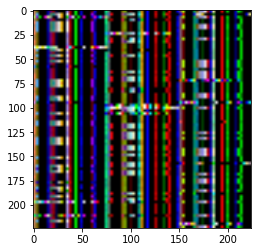

In [ ]:
#Single image prediction
import cv2
import matplotlib.pyplot as plt
test=cv2.imread(test_images[0])

img_show=test[:,:,[2,1,0]]
test=test/255.
test_shape=(1,)+test.shape
test=test.reshape(test_shape)

res=CNN_model.predict(test)

prob=res[0,np.argmax(res,axis=1)[0]]
res=label[np.argmax(res,axis=1)[0]]
print('Predicted result for the first image: %s'%res)
print('Confidence level: %s'%prob)
plt.imshow(img_show)
plt.show()

In [ ]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)

    CNN_model_batch=CNN_model.predict(thisimg) #use master model to process the input image

    #generate result by model 1
    prob=CNN_model_batch[0,np.argmax(CNN_model_batch,axis=1)[0]]
    res=label[np.argmax(CNN_model_batch,axis=1)[0]]
    predict.append(res)

#t2 = time.time()
#print('prediction time is : %f seconds' % (t2-t1))


1/1 [==============================] - 0s 14ms/step
CPU times: user 1min 23s, sys: 3.86 s, total: 1min 26s
Wall time: 1min 35s


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('CNN accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3']
print(classification_report(test_laels, predict, target_names=target_names , digits=5))

CNN accuracy: 0.9982698961937716
precision: 0.9982827434992634
recall: 0.9982698961937716
f1: 0.9982706694177205
[[388   0   0   0]
 [  0 528   0   3]
 [  0   0 414   0]
 [  0   0   0 401]]
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       388
           1    1.00000   0.99435   0.99717       531
           2    1.00000   1.00000   1.00000       414
           3    0.99257   1.00000   0.99627       401

    accuracy                        0.99827      1734
   macro avg    0.99814   0.99859   0.99836      1734
weighted avg    0.99828   0.99827   0.99827      1734



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_laels, predict)
cnf_matrix = cm
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('TPR : ',TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print('TNR : ',TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('PPV : ',PPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR : ',FPR)
# False negative rate
FNR = FN/(TP+FN)
print('FNR : ',FNR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('ACC : ',ACC)

TPR :  [1.         0.99435028 1.         1.        ]
TNR :  [1.         1.         1.         0.99774944]
PPV :  [1.         1.         1.         0.99257426]
FPR :  [0.         0.         0.         0.00225056]
FNR :  [0.         0.00564972 0.         0.        ]
ACC :  [1.        0.9982699 1.        0.9982699]
